####**IMPORTING ALL THE DEPENDENCIES**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

import matplotlib.pyplot as plt

####**LOADING THE DATASET**

In [ ]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

####**VIEWING THE SHAPE OF X_TRAIN,Y_TRAIN,X_TEST,Y_TEST**

In [ ]:
print("X_TRAIN SHAPE",x_train.shape)
print("\nY_TRAIN SHAPE",y_train.shape)
print("\nX_TEST SHAPE",x_test.shape)
print("\nY_TEST SHAPE",y_test.shape)

X_TRAIN SHAPE (60000, 28, 28)

Y_TRAIN SHAPE (60000,)

X_TEST SHAPE (10000, 28, 28)

Y_TEST SHAPE (10000,)


In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
y_train[0]

5

####**VISUALIZING THE DATA USING MATPLOTLIB'S "imshow()" METHOD**

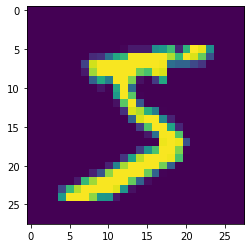

In [ ]:
plt.imshow(x_train[0])

####**SCALING THE DATA, INORDER TO IMPROVE THE PERFORMANCE OF THE MODEL**

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

####**BUILDING THE SEQUENTIAL MODEL**

> FLATTEN WILL HELP TO FLATTEN THE 2-DIMNSIONAL ARRAY.

> HIDDEN LAYER-1 CONSIST OF 128 NODES AND LAYER-2 CONSIST OF 64 NODES.

> ACTIVATION FUNCTION USED FOR THE HIDDEN LAYER IS "reLU".

> ACTIVATION FUNCTION USED FOR THE OUTPUT LAYER IS "softmax", SINCE WE ARE DEALING WITH A MULTI-CLASS CLASSIFICATION PROBLEM.


In [ ]:
model= Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation= 'relu'))
model.add(Dense(64,activation="relu"))
model.add(Dense(10,activation="softmax"))

####**VIEWING THE SUMMARY OF TE MODEL**

> INPUT LAYER CONSIST OF 784 NODES i.e 28*28

> "dense" CONSIST OF 100480 PARAMETERS i.e (784 nodes * 128 nodes + 128 biases)

> "dense_1" CONSIST OF 8256 PARAMETERS i.e (128 nodes * 64 nodes + 64 biases)

> "dense_2"[OUTPUT LAYER] CONSIST OF 650 PARAMETERS i.e (64 nodes * 10 nodes + 10 biases)

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


####**COMPILE AND FIT THE MODEL**

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="Adam",metrics=["accuracy"])

In [ ]:
history = model.fit(x_train,y_train,epochs=20,validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0100 - accuracy: 0.9969 - val_loss: 0.1471 - val_accuracy: 0.9754
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0087 - accuracy: 0.9971 - val_loss: 0.1445 - val_accuracy: 0.9753
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0072 - accuracy: 0.9976 - val_loss: 0.1519 - val_accuracy: 0.9767
Epoch 4/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0082 - accuracy: 0.9971 - val_loss: 0.1830 - val_accuracy: 0.9733
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0081 - accuracy: 0.9972 - val_loss: 0.1629 - val_accuracy: 0.9761
Epoch 6/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0085 - accuracy: 0.9973 - val_loss: 0.1663 - val_accuracy: 0.9765
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0068 - accuracy: 0.9979 - val_loss: 0.1601 - val_accuracy:

####**FINDING THE ACCURACY OF THE MODEL**

In [ ]:
y_predicted_probablity = model.predict(x_test)

y_predict = y_predicted_probablity.argmax(axis=1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.9809

In [ ]:
model.predict(x_test[5].reshape(1,28,28)).argmax()

1

In [ ]:
y_test[5]

1